In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
# Load your dataset
df = pd.read_excel("C:/Users/victus/Data_Science/New folder/Clustering/Clustering/EastWestAirlines.xlsx",sheet_name='data')

In [10]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [29]:
# Check for missing values
df.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [30]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [12]:
# Remove outliers (using z-score or IQR)
from scipy import stats
df_clean = df_imputed[(np.abs(stats.zscore(df_imputed)) < 3).all(axis=1)]


In [13]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

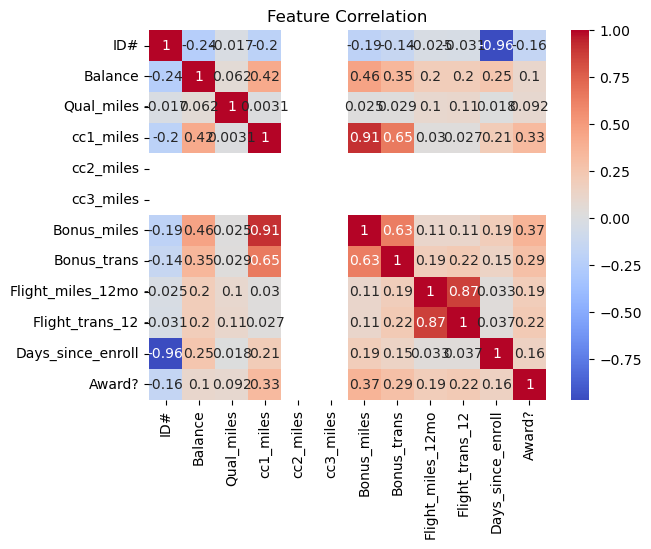

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

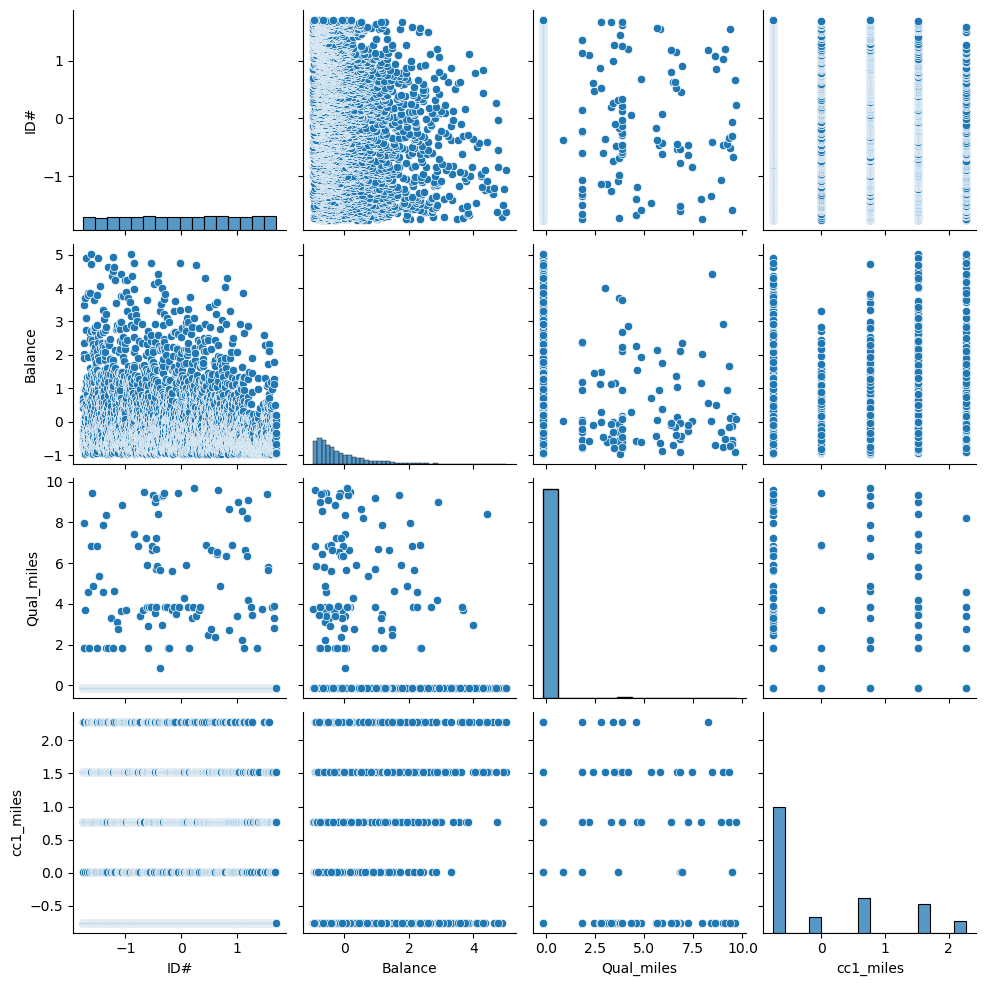

In [15]:
# Pairplot (if few features)
sns.pairplot(df_scaled.iloc[:, :4])  # Select first 4 features for readability
plt.show()


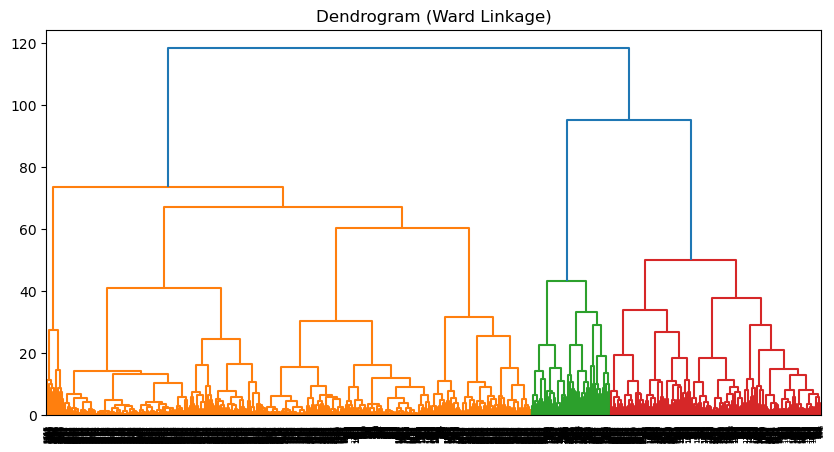

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram (Ward Linkage)")
plt.show()

# Assign clusters
labels_hier = fcluster(linked, 3, criterion='maxclust')


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score  # <-- Add this line

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(df_scaled)


In [18]:
# DBSCAN sometimes labels some points as noise (-1). Make sure there's more than 1 cluster for silhouette score
if len(set(labels_dbscan)) > 1:
    print("Silhouette Score (DBSCAN):", silhouette_score(df_scaled, labels_dbscan))
else:
    print("Silhouette Score (DBSCAN): Cannot be calculated - only one cluster found")

Silhouette Score (DBSCAN): 0.18885114313037532


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(df_scaled)

#Evaluate
print("Silhouette Score (KMeans):", silhouette_score(df_scaled, labels_kmeans))


Silhouette Score (KMeans): 0.29192710837860614


In [20]:
# Add labels back to the DataFrame
df_clean["KMeans_Labels"] = labels_kmeans
df_clean["Hierarchical_Labels"] = labels_hier
df_clean["DBSCAN_Labels"] = labels_dbscan


C:\Users\victus\AppData\Local\Temp\ipykernel_17056\3527983562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["KMeans_Labels"] = labels_kmeans
C:\Users\victus\AppData\Local\Temp\ipykernel_17056\3527983562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Hierarchical_Labels"] = labels_hier
C:\Users\victus\AppData\Local\Temp\ipykernel_17056\3527983562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [21]:
import seaborn as sns

# 2D Visualization with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df_vis = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
df_vis["KMeans"] = labels_kmeans
df_vis["Hierarchical"] = labels_hier
df_vis["DBSCAN"] = labels_dbscan

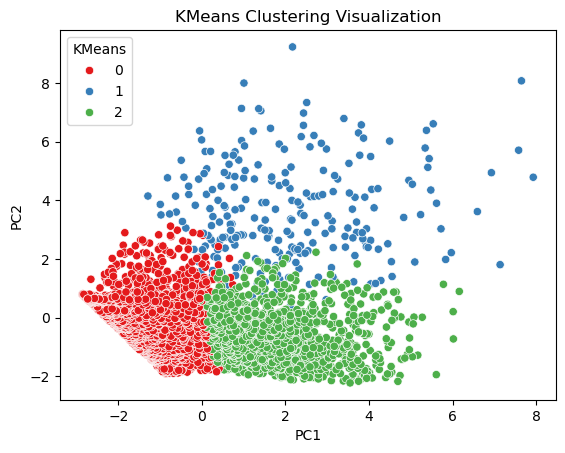

In [22]:
# KMeans Visualization
sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="KMeans", palette="Set1")
plt.title("KMeans Clustering Visualization")
plt.show()


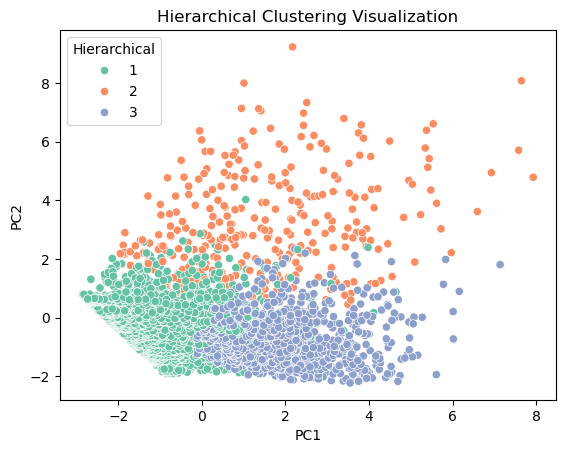

In [23]:
# Hierarchical Visualization
sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="Hierarchical", palette="Set2")
plt.title("Hierarchical Clustering Visualization")
plt.show()

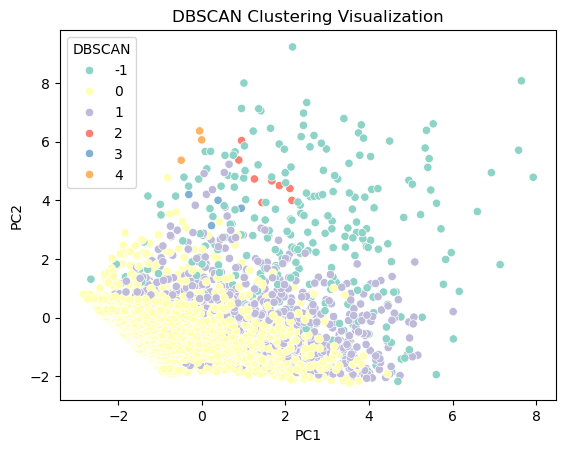

In [24]:
# DBSCAN Visualization
sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="DBSCAN", palette="Set3")
plt.title("DBSCAN Clustering Visualization")
plt.show()

In [25]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

In [26]:
# Create a DataFrame with PCA components and cluster labels
df_viz = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_viz['KMeans_Labels'] = labels_kmeans  # ensure this is defined earlier


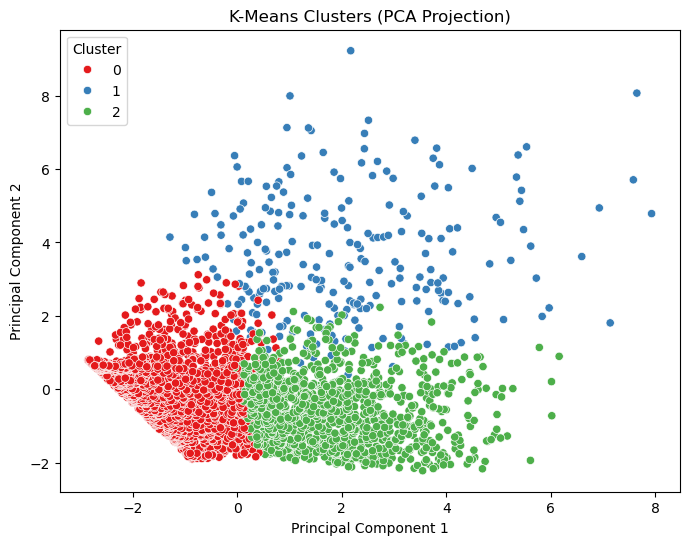

In [27]:
# Plotting K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Labels', data=df_viz, palette='Set1')
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
